<h1 style="font-size: 40px; margin-bottom: 0px;">8.2 Chromatin domains</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

If we have time, we'll take a look at chromatin markers that signify an active enhancer region, specifically around our focused set of overlapping peaks. This will give us an idea of which of our peaks overlap with enhancers that have been marked as active based on the region's epigenetic signature. We'll continue to make use of HOMER, particularly the <code>annotatePeaks.pl</code> program, but we'll provide an another option to slightly change the way it runs.

<strong>Learning objectives:</strong>

<ul>
    <li>Continue to practice using HOMER to analyze CHIP-seq data</li>
    <li>Generate heatmaps of read coverage around a region of interest</li>
    <li>Infer enhancer or promoter activity based on epigenetic signatures</li>
    <li>Plot TF read coverage alongside histone read coverage</li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h1 style="font-size: 40px; margin-bottom: 0px;">Analyze epigenetic signatures</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

I have a <code>histone</code> directory located within our shared <code>chip</code> directory, containing the bedGraph files from <a href="https://doi.org/10.1186/1471-2164-15-331" rel="noopener noreferrer" target="_blank"><u>Rhie et al 2014</u></a> (<a href="https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE49651" rel="noopener noreferrer" target="_blank"><u>GSE49651</u></a>), which Zanconato et al 2015 also used in their analyses. We'll be using their read coverage data to get an idea of the epigenetic signature around our peaks. 

Here, we'll call up the <code>annotatePeaks.pl</code> program and make use of its histogram mode. But rather than have it simply provide us with the read density along all peaks in a single column, we can tell it to provide us with a data matrix, where we can then see the read coverage for each peak individually.

<h3>Create <code>heatmap</code> directory and enter it</h3>

Let's create a new directory called <code>heatmap</code> in this week's directory and change into it.

<pre style="width: 450px; margin-top: 15px; margin-bottom: 15px; color: #000000; background-color: #EEEEEE; border: 1px solid; border-color: #AAAAAA; padding: 10px; border-radius: 15px; font-size: 12px;">mkdir heatmap</pre>

<pre style="width: 450px; margin-top: 15px; margin-bottom: 15px; color: #000000; background-color: #EEEEEE; border: 1px solid; border-color: #AAAAAA; padding: 10px; border-radius: 15px; font-size: 12px;">cd heatmap</pre>

<hr style="border: 1px solid; border-color: #BBBBBB;"></hr>

<h3>Obtain data matrix for h3k4me1</h3>

<pre style="width: 450px; margin-top: 15px; margin-bottom: 15px; color: #000000; background-color: #EEEEEE; border: 1px solid; border-color: #AAAAAA; padding: 10px; border-radius: 15px; font-size: 12px;">annotatePeaks.pl \
~/MCB201B_F2024/Week_8/top_concordant_peaks.narrowPeak \
hg19 \
-bedGraph ~/shared/course/mcb201b-shared-readwrite/chip/histone/h3k4me1-1.bedGraph \
-size 2000 \
-hist 10 \
-ghist \
> h3k4me1_heatmap.txt</pre>

<strong>Let's break down the code:</strong>

<code>annotatePeaks.pl</code>

This calls up the annotatePeaks program.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>~/MCB201B_F2024/Week_8/top_concordant_peaks.narrowPeak</code>

Here, we provide HOMER with our focused set of overlapping peaks.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>-bedGraph ~/shared/course/mcb201b-shared-readwrite/chip/histone/h3k4me1-1.bedGraph</code>

We provide it with coverage maps of the reads associated with one of our histone marks, which will give us an idea of the activity of the peak region, each of these marks are is associated with an active enhancer or promoter site.


<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>-size 2000</code>

Like yesterday, we use the <code>-size</code> option to specify the size of the region around our peaks that we are interested in looking at.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>-hist 10</code>

We provide the bin size and also switch to histogram mode, so the annotatePeaks program will provide us with information on read distributions.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>-ghist</code>

You can kind of think of the <code>-ghist</code> option as switching to a different sub-mode of the histogram mode. Instead of providing us with the read coverage for all peaks at once, it will give us the read coverage for each peak in the form of a data matrix, where the rows correspond to different peaks, and the columns provide us with the read densities along those positions for each peak.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>&gt; h3k4me1_heatmap.txt</code>

We specify our output file that we want the data matrix to be stored in. This redirects the annotatePeaks output from the Terminal window to a .txt file that we can open up in Python to visualize the data.

<h2>Plot heatmap of read densities</h2>

Now let's make use of seaborn's heatmap function to visualize the read densities of H3K4me1 marks around our peaks.

First import our data matrix:

In [2]:
h3k4me1 = pd.read_csv('~/MCB201B_F2024/Week_8/heatmap/h3k4me1_heatmap.txt',
                      delimiter='\t'
                     )

Then, let's drop the first column to keep things simple for us later on.

In [4]:
h3k4me1 = h3k4me1.drop(columns=['Gene'])

In [5]:
h3k4me1.head().style

,-1000,-990,-980,-970,-960,-950,-940,-930,-920,-910,-900,-890,-880,-870,-860,-850,-840,-830,-820,-810,-800,-790,-780,-770,-760,-750,-740,-730,-720,-710,-700,-690,-680,-670,-660,-650,-640,-630,-620,-610,-600,-590,-580,-570,-560,-550,-540,-530,-520,-510,-500,-490,-480,-470,-460,-450,-440,-430,-420,-410,-400,-390,-380,-370,-360,-350,-340,-330,-320,-310,-300,-290,-280,-270,-260,-250,-240,-230,-220,-210,-200,-190,-180,-170,-160,-150,-140,-130,-120,-110,-100,-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800,810,820,830,840,850,860,870,880,890,900,910,920,930,940,950,960,970,980,990,1000
0,0.000000,0.000000,0.000000,0.000000,0.000000,1.700000,1.700000,1.700000,1.700000,1.700000,1.700000,1.700000,1.700000,1.700000,1.700000,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,4.600000,4.600000,4.600000,4.600000,4.600000,4.600000,4.600000,4.600000,4.600000,4.600000,3.900000,3.900000,4.500000,4.500000,4.500000,4.500000,4.500000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.800000,4.800000,4.800000,4.800000,4.900000,4.900000,5.100000,5.100000,5.100000,5.100000,5.100000,5.800000,5.800000,5.800000,5.800000,5.800000,5.800000,5.800000,5.800000,6.600000,6.600000,6.600000,6.600000,6.600000,6.600000,7.000000,7.000000,7.000000,7.000000,7.000000,6.500000,6.500000,6.900000,6.900000,6.900000,6.900000,6.900000,6.900000,6.900000,6.300000,6.300000,6.300000,6.300000,6.300000,6.300000,6.300000,6.300000,6.300000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,5.200000,5.200000,5.200000,5.200000,5.200000,5.200000,5.200000,5.200000,5.200000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.300000,4.300000,3.900000,3.900000,3.900000,3.900000,4.700000,4.700000,4.700000,4.700000,4.700000,4.700000,4.700000,4.700000,4.700000,4.700000,4.300000,4.300000,4.300000,4.300000,4.300000,4.300000,4.300000,4.300000,4.300000,3.300000,3.300000,3.300000,3.300000,3.300000,3.300000,3.100000,3.100000,3.100000,3.100000,3.100000,3.800000,3.800000,3.800000,3.800000,3.800000,3.800000,3.800000,3.800000,3.800000,3.800000,3.800000,3.800000,3.800000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,4.900000,4.900000,4.900000,4.900000,4.900000,5.000000,5.000000,4.700000,4.700000,4.700000,4.700000
1,0.000000,5.800000,5.800000,5.800000,5.800000,5.800000,4.600000,4.600000,4.600000,4.600000,4.600000,4.600000,4.600000,4.600000,4.600000,4.600000,5.400000,5.400000,5.400000,5.400000,5.400000,7.200000,7.200000,7.200000,7.200000,7.200000,7.000000,7.000000,8.400000,8.400000,8.400000,10.300000,10.300000,10.300000,10.300000,10.300000,12.900000,12.900000,14.000000,14.000000,14.000000,14.000000,14.700000,15.100000,15.100000,15.100000,15.100000,15.100000,14.500000,14.500000,14.500000,14.500000,13.800000,13.000000,13.000000,14.400000,14.400000,15.300000,15.300000,14.500000,14.500000,14.500000,12.400000,12.400000,12.400000,12.400000,10.800000,10.800000,10.800000,9.600000,9.600000,9.600000,9.000000,9.000000,9.000000,9.000000,8.100000,8.100000,8.100000,5.700000,5.700000,4.100000,4.100000,4.100000,4.100000,4.100000,4.100000,4.100000,4.100000,2.600000,2.600000,2.600000,2.600000,2.600000,2.600000,2.600000,2.600000,2.600000,2.600000,1.400000,1.400000,1.400000,1.400000,1.400000,1.400000,1.400000,1.400000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,5.100000,5.100000,5.100000,5.100000,5.100000,7.100000,7.100000,7.100000,7.100000,8.800000,8.800000,8.800000,8.800000,10.100000,10.100000,10.100000,10.100000,10.100000,11.500000,11.500000,11.500000,11.100000,11

Now, let's plot the heatmap using seaborn.

<Axes: >

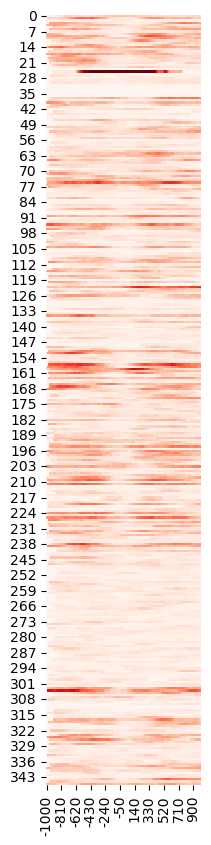

In [8]:
fig, ax = plt.subplots(figsize=(2,10))

sns.heatmap(h3k4me1,
           vmin=0,
           vmax=30,
           cmap='Reds',
           cbar=False,
           )

In [9]:
me1_lineplot = pd.read_csv('~/MCB201B_F2024/Week_8/heatmap/h3k4me1_lineplot.txt',
                           delimiter='\t'
                          )

<Axes: xlabel='Distance from Center (cmd=annotatePeaks.pl /home/jovyan/MCB201B_F2024/Week_8/top_concordant_peaks.narrowPeak hg19 -bedGraph /home/jovyan/shared/course/mcb201b-shared-readwrite/chip/histone/h3k4me1-1.bedGraph -size 2000 -hist 10)', ylabel='/home/jovyan/shared/course/mcb201b-shared-readwrite/chip/histone/h3k4me1-1.bedGraph Coverage'>

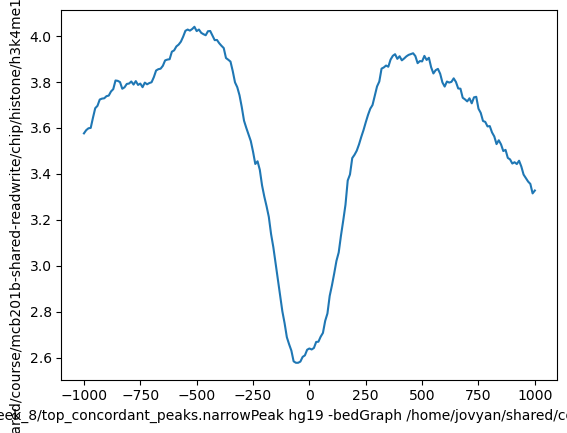

In [11]:
sns.lineplot(x=me1_lineplot.iloc[:,0],
             y=me1_lineplot.iloc[:,1]
            )

And we can reorder it so that the peaks with the highest mean reads are up top

In [13]:
h3k4me1['means'] = h3k4me1.mean(axis=1)

In [14]:
h3k4me1 = h3k4me1.sort_values(by=['means'], ascending=False)

In [16]:
h3k4me1 = h3k4me1.drop(columns=['means'])

<Axes: >

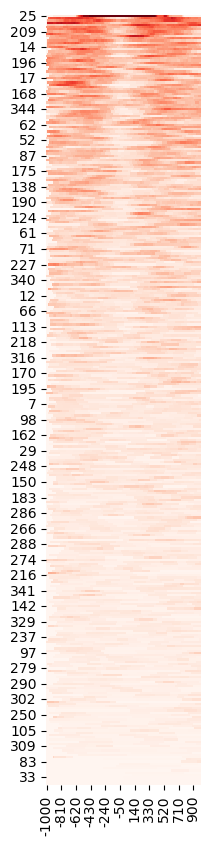

In [17]:
fig, ax = plt.subplots(figsize=(2,10))

sns.heatmap(h3k4me1,
           vmin=0,
           vmax=30,
           cmap='Reds',
           cbar=False,
           )

<h1 style="font-size: 40px; margin-bottom: 0px;">Analyze other histone marks</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

If we have time, see if you can do the same for the other histone marks.

<h3>Obtain data matrix of read densities for H3K4me3</h3>

<pre style="width: 450px; margin-top: 15px; margin-bottom: 15px; color: #000000; background-color: #EEEEEE; border: 1px solid; border-color: #AAAAAA; padding: 10px; border-radius: 15px; font-size: 12px;">annotatePeaks.pl \
~/MCB201B_F2024/Week_8/top_concordant_peaks.narrowPeak \
hg19 \
-bedGraph ~/shared/course/mcb201b-shared-readwrite/chip/histone/h3k4me3-1.bedGraph \
-size 2000 \
-hist 10 \
-ghist \
> h3k4me3_heatmap.txt</pre>

<hr style="border: 1px solid; border-color: #BBBBBB;"></hr>

<h3>Obtain data matrix of read densities for H3K27Ac</h3>

<pre style="width: 450px; margin-top: 15px; margin-bottom: 15px; color: #000000; background-color: #EEEEEE; border: 1px solid; border-color: #AAAAAA; padding: 10px; border-radius: 15px; font-size: 12px;">annotatePeaks.pl \
~/MCB201B_F2024/Week_8/top_concordant_peaks.narrowPeak \
hg19 \
-bedGraph ~/shared/course/mcb201b-shared-readwrite/chip/histone/h3k27ac-1.bedGraph \
-size 2000 \
-hist 10 \
-ghist \
> h3k27ac_heatmap.txt</pre>

<h2>Plot their heatmaps</h2>

In [18]:
h3k4me3 = pd.read_csv('~/MCB201B_F2024/Week_8/heatmap/h3k4me3_heatmap.txt',
                      delimiter='\t'
                     )
h3k27ac = pd.read_csv('~/MCB201B_F2024/Week_8/heatmap/h3k27ac_heatmap.txt',
                      delimiter='\t'
                     )

In [19]:
h3k4me3 = h3k4me3.drop(columns=['Gene'])

In [20]:
h3k27ac = h3k27ac.drop(columns=['Gene'])

<Axes: >

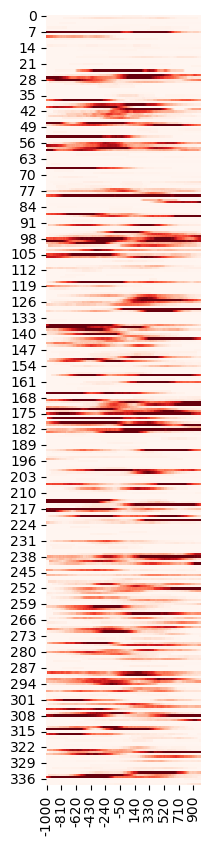

In [23]:
fig, ax = plt.subplots(figsize=(2,10))

sns.heatmap(h3k4me3,
           vmin=0,
           vmax=100,
           cmap='Reds',
           cbar=False,
           )

Text(0.5, 1.0, 'H3K27ac')

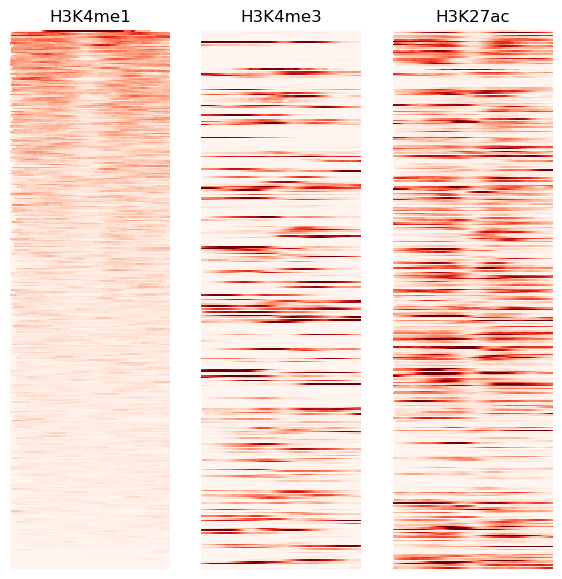

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(7,7))

sns.heatmap(h3k4me1,
           vmin=0,
           vmax=30,
           cmap='Reds',
           cbar=False,
            ax=ax[0],
            yticklabels=False,
            xticklabels=False
           )

sns.heatmap(h3k4me3,
           vmin=0,
           vmax=150,
           cmap='Reds',
           cbar=False,
            ax=ax[1],
            yticklabels=False,
            xticklabels=False
           )

sns.heatmap(h3k27ac,
           vmin=0,
           vmax=100,
           cmap='Reds',
           cbar=False,
            ax=ax[2],
            yticklabels=False,
            xticklabels=False
           )

ax[0].set_title('H3K4me1')
ax[1].set_title('H3K4me3')
ax[2].set_title('H3K27ac')

<h1 style="font-size: 40px; margin-bottom: 0px;">References</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 400px;"></hr>

<a href="https://bmcgenomics.biomedcentral.com/articles/10.1186/1471-2164-15-331" rel="noopener noreferrer" target="_blank"><u>Rhie et al 2014 BMC Genomics:</u></a> Nucleosome positioning and histone modifications define relationships between regulatory elements and nearby gene expression in breast epithelial cells